In [231]:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
file_path='result.json'
with open(file_path, 'r', encoding='utf-8') as file:
    df = json.load(file)
data=pd.DataFrame(df['messages'])
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alogi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,type,date,date_unixtime,actor,actor_id,action,text,text_entities,from,...,width,height,edited,edited_unixtime,photo,reply_to_message_id,discard_reason,message_id,forwarded_from,location_information
0,6575,service,2023-06-30T09:00:09,1688104809,Little Shark,user6309613410,joined_telegram,,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6576,message,2023-06-30T09:04:47,1688105087,NaN,NaN,NaN,Hello handsome🌻,"[{'type': 'plain', 'text': 'Hello handsome🌻'}]",Little Shark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6577,message,2023-06-30T09:32:10,1688106730,NaN,NaN,NaN,,[],My❤️,...,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6578,message,2023-06-30T09:45:33,1688107533,NaN,NaN,NaN,You’re cute,"[{'type': 'plain', 'text': 'You’re cute'}]",Little Shark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6580,message,2023-06-30T11:49:32,1688114972,NaN,NaN,NaN,,[],My❤️,...,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
data=data[['date_unixtime','from','text']]
data.dropna(inplace=True)
# I'm inetrested only int text messages, so I drop all other types of messages
data['text'] = data['text'].str.strip()
data = data[data['text'] != '']
data['date_time'] = pd.to_datetime(data['date_unixtime'], unit='s')
data['date']=data['date_time'].dt.date
data['time']=data['date_time'].dt.time
data=data[['date','time','from','text']]
data['date'] = data['date'].apply(lambda x: x.strftime('%d.%m.%y'))
data_=data.copy()

C:\Users\alogi\AppData\Local\Temp\ipykernel_2644\378295267.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date_time'] = pd.to_datetime(data['date_unixtime'], unit='s')


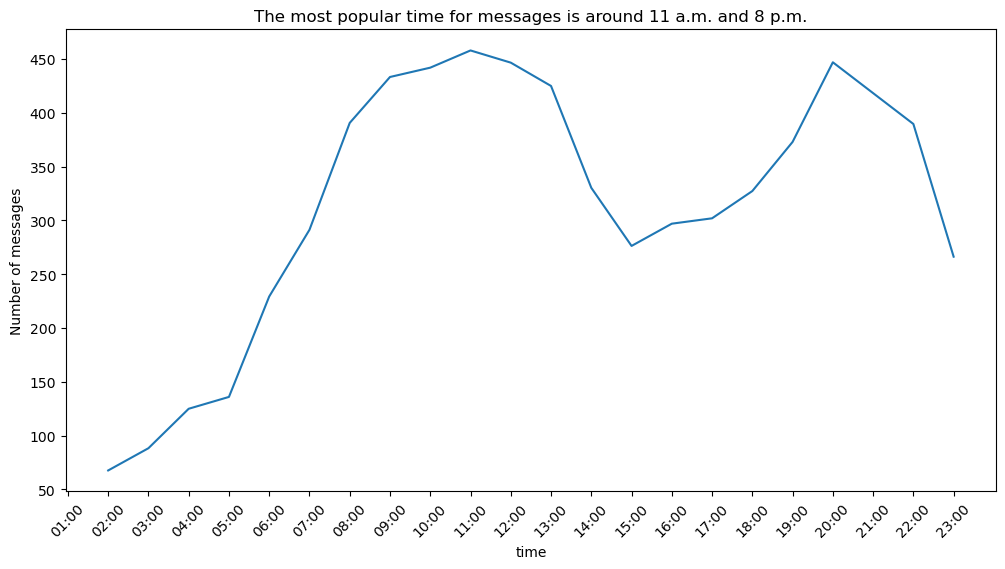

In [233]:
data_['time'] = pd.to_datetime(data_['time'], format='%H:%M:%S')
hourly_counts = data_['time'].dt.hour.value_counts().sort_index()
time_labels = [f"{hour:02d}:00" for hour in hourly_counts.index]

window_size = 3
smoothed_hourly_counts = hourly_counts.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(time_labels, smoothed_hourly_counts.values, linestyle='-')
plt.title('The most popular time for messages is around 11 a.m. and 8 p.m.')
plt.xlabel('time')
plt.ylabel('Number of messages')
plt.xticks(rotation=45)
plt.show()

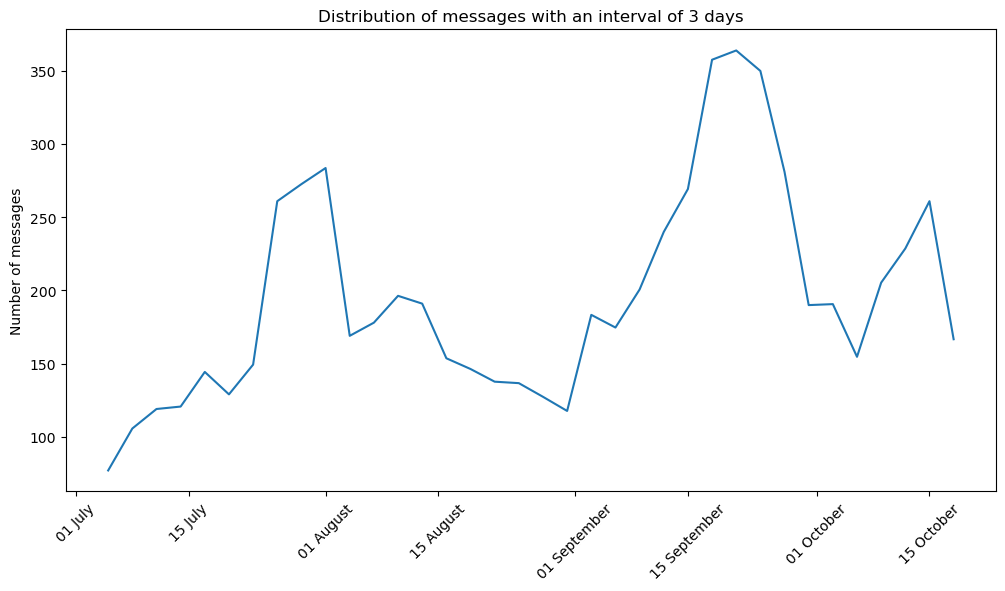

In [234]:
data_['date'] = pd.to_datetime(data_['date'], format='%d.%m.%y')
interval = pd.DateOffset(days=3)
data_['interval'] = data_['date'].apply(lambda x: x - pd.DateOffset(days=x.dayofyear % 3))
aggregated_counts = data_['interval'].value_counts().sort_index()
smoothed_counts = aggregated_counts.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(smoothed_counts.index, smoothed_counts.values, linestyle='-')
plt.title('Distribution of messages with an interval of 3 days')
plt.xlabel('')
plt.ylabel('Number of messages')
plt.xticks(rotation=45)
date_format = DateFormatter("%d %B")
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()


In [235]:
def extract_emojis(text):
    if isinstance(text, str):
        emoji_dict = {}
        for char in text:
            if emoji.is_emoji(char):
                if char in emoji_dict:
                    emoji_dict[char] += 1
                else:
                    emoji_dict[char] = 1
        return emoji_dict
    else:
        return {}

data['emojis'] = data['text'].apply(extract_emojis)
data = data[data['emojis'].apply(lambda x: bool(x))]

In [236]:
person1_emoji_counts = {}
person2_emoji_counts = {}

for index, row in data.iterrows():
    name = row['from']
    emojis_dict = row['emojis']

    if name == 'Little Shark':
        person_emoji_counts = person1_emoji_counts
    else:
        person_emoji_counts = person2_emoji_counts

    for emoji, count in emojis_dict.items():
        if emoji in person_emoji_counts:
            person_emoji_counts[emoji] += count
        else:
            person_emoji_counts[emoji] = count
print("Little Shark Emoji Counts:")
print(person1_emoji_counts)
print("My❤️ Emoji Counts:")
print(person2_emoji_counts)




Little Shark Emoji Counts:
{'🌻': 5, '😂': 427, '🥹': 5, '😉': 1, '😗': 9, '🙄': 1, '❤': 1, '💛': 21, '🫶': 7, '🏼': 8, '🍾': 2, '✨': 3, '🌈': 1, '😈': 2, '🥺': 2, '🥰': 1, '🫢': 1, '🤤': 1, '☺': 1, '😛': 2, '🎉': 3, '🤌': 1, '😎': 2, '😘': 1}
My❤️ Emoji Counts:
{'❤': 49, '🥰': 10, '👌': 24, '😂': 360, '🌻': 1, '🚿': 1, '🔥': 1, '😔': 2, '💋': 4, '😊': 1, '🥺': 1, '😘': 2, '💕': 3}


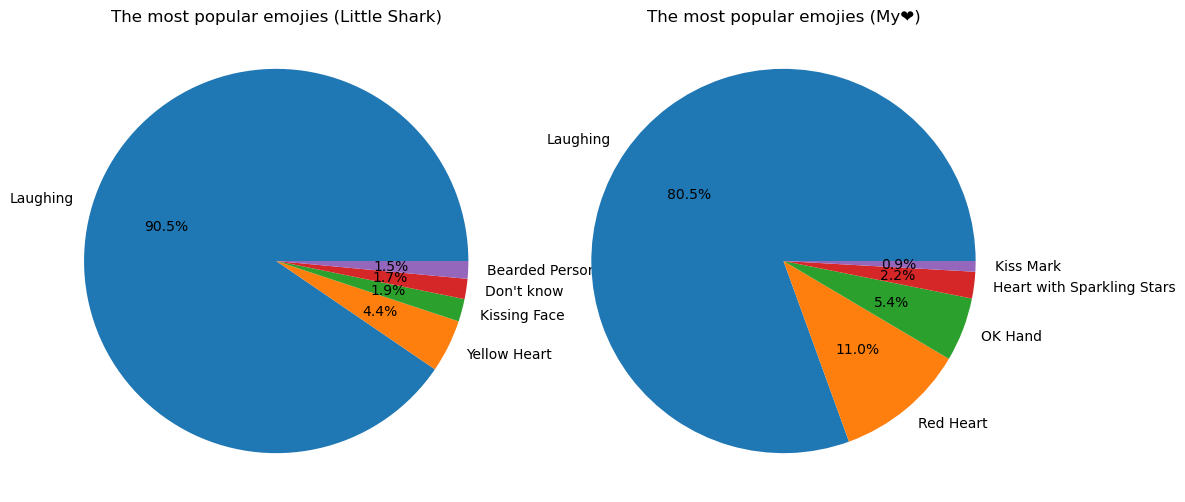

In [237]:
# for Little shark
sorted_emoji_counts1 = dict(sorted(person1_emoji_counts.items(), key=lambda item: item[1], reverse=True))
top_emoji_counts1 = dict(list(sorted_emoji_counts1.items())[:5])

# for my
sorted_emoji_counts2 = dict(sorted(person2_emoji_counts.items(), key=lambda item: item[1], reverse=True))
top_emoji_counts2 = dict(list(sorted_emoji_counts2.items())[:5])

# dict of top emojies
emoji_labels1 = list(top_emoji_counts1.keys())
emoji_values1 = list(top_emoji_counts1.values())
emoji_labels2 = list(top_emoji_counts2.keys())
emoji_values2 = list(top_emoji_counts2.values())

# print top emojies for both
'''for emoji, count in top_emoji_counts1.items():
    print(f"Little shark emojeis: {emoji}, number: {count}")
for emoji, count in top_emoji_counts2.items():
    print(f"my emojeis: {emoji}, number: {count}")'''

# I can't visualizate emojies,so I'll code them
emoji_labels = {
    '😂': 'Laughing',
    '💛': 'Yellow Heart',
    '😗': 'Kissing Face',
    '🏼': "Don't know",
    '🫶': 'Bearded Person',
    '❤': 'Red Heart',
    '👌': 'OK Hand',
    '🥰': 'Heart with Sparkling Stars',
    '💋': 'Kiss Mark'
}

emoji_labels1 = [emoji_labels.get(emoji, emoji) for emoji in emoji_labels1]
emoji_values1 = list(top_emoji_counts1.values())
emoji_labels2 = [emoji_labels.get(emoji, emoji) for emoji in emoji_labels2]
emoji_values2 = list(top_emoji_counts2.values())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.pie(emoji_values1, labels=emoji_labels1, autopct='%1.1f%%')
plt.title("The most popular emojies (Little Shark)")
plt.axis('equal')

plt.subplot(1, 2, 2)  # Второй график для My
plt.pie(emoji_values2, labels=emoji_labels2, autopct='%1.1f%%')
plt.title("The most popular emojies (My❤️)")
plt.axis('equal')

plt.show()

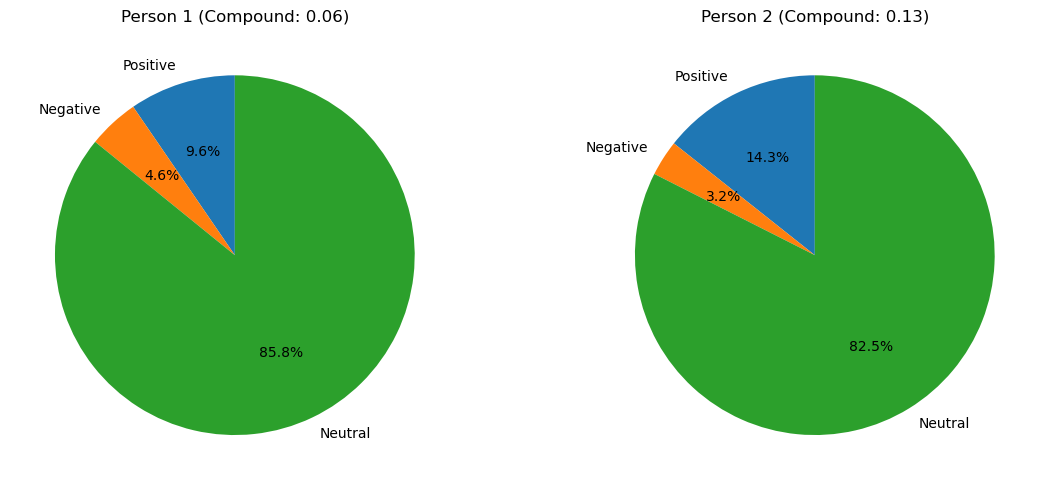

In [238]:
sentiments=SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["text"]]

person1_data = data[data["from"] == "Little Shark"]
person1_positive = person1_data["Positive"].mean()
person1_negative = person1_data["Negative"].mean()
person1_neutral = person1_data["Neutral"].mean()
person1_compound = person1_data["Compound"].mean()

person2_data = data[data["from"] == "My❤️"]
person2_positive = person2_data["Positive"].mean()
person2_negative = person2_data["Negative"].mean()
person2_neutral = person2_data["Neutral"].mean()
person2_compound = person2_data["Compound"].mean()

labels = ['Positive', 'Negative', 'Neutral']
sizes_person1 = [person1_positive, person1_negative, person1_neutral]
sizes_person2 = [person2_positive, person2_negative, person2_neutral]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].pie(sizes_person1, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f'Person 1 (Compound: {person1_compound:.2f})')

axes[1].pie(sizes_person2, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f'Person 2 (Compound: {person2_compound:.2f})')

plt.tight_layout()
plt.show()